## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv('dataset/kaggle_diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

Text(0.5, 0, 'Has Diabetes')

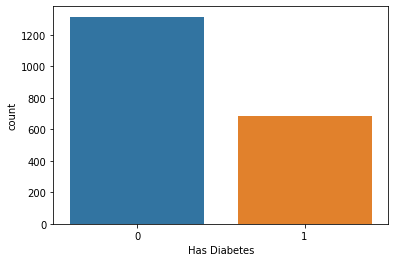

In [7]:
sns.countplot(x='Outcome' ,data=data)
plt.xlabel('Has Diabetes')

## Handling Missing Values

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

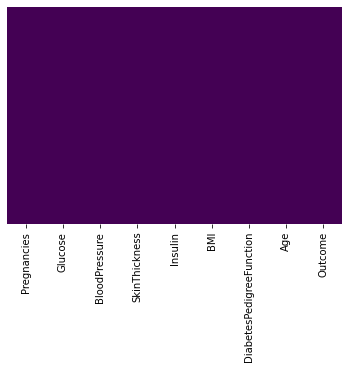

In [9]:
sns.heatmap(data.isnull() ,yticklabels=False ,cbar=False ,cmap='viridis')

## Correlation

In [10]:
data.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
Name: Outcome, dtype: float64

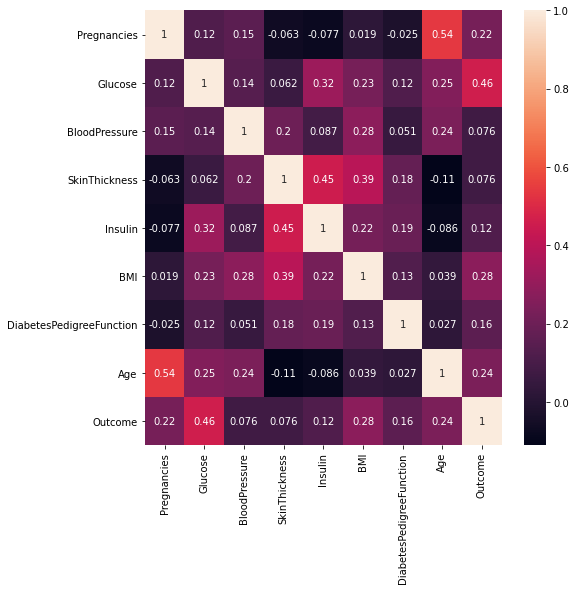

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr() ,annot=True )
plt.show()

## Zero Values

In [12]:
data.select_dtypes(include=[np.number]).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data_ = data.copy(deep=True)

data_[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_[[
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [14]:
data_.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

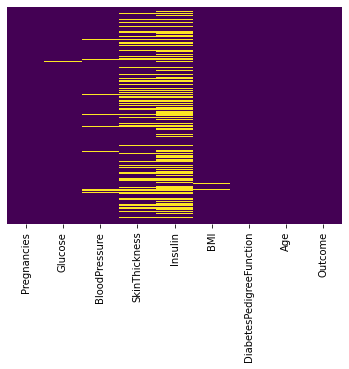

In [15]:
sns.heatmap(data_.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Imputation (for replacing NaN values)

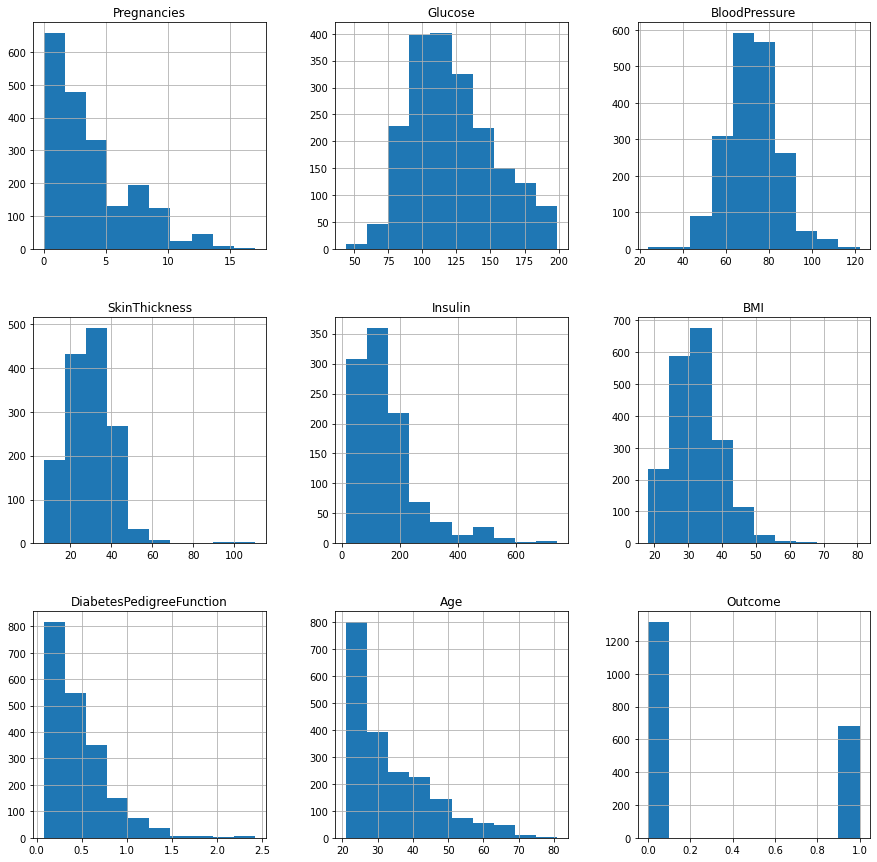

In [16]:
# data distribution
data_.hist(figsize=(15,15))
plt.show()

In [17]:
# Replacing NaN value by mean, median depending upon distribution
# if the distribution is skewed then replace by median ,else replace by mean 

# mean
data_['Glucose'].fillna(data_['Glucose'].mean() ,inplace=True)
data_['BloodPressure'].fillna(data_['BloodPressure'].mean(), inplace=True)


In [18]:
# median 

data_['SkinThickness'].fillna(data_['SkinThickness'].median(), inplace=True)
data_['Insulin'].fillna(data_['Insulin'].median(), inplace=True)
data_['BMI'].fillna(data_['BMI'].median(), inplace=True)


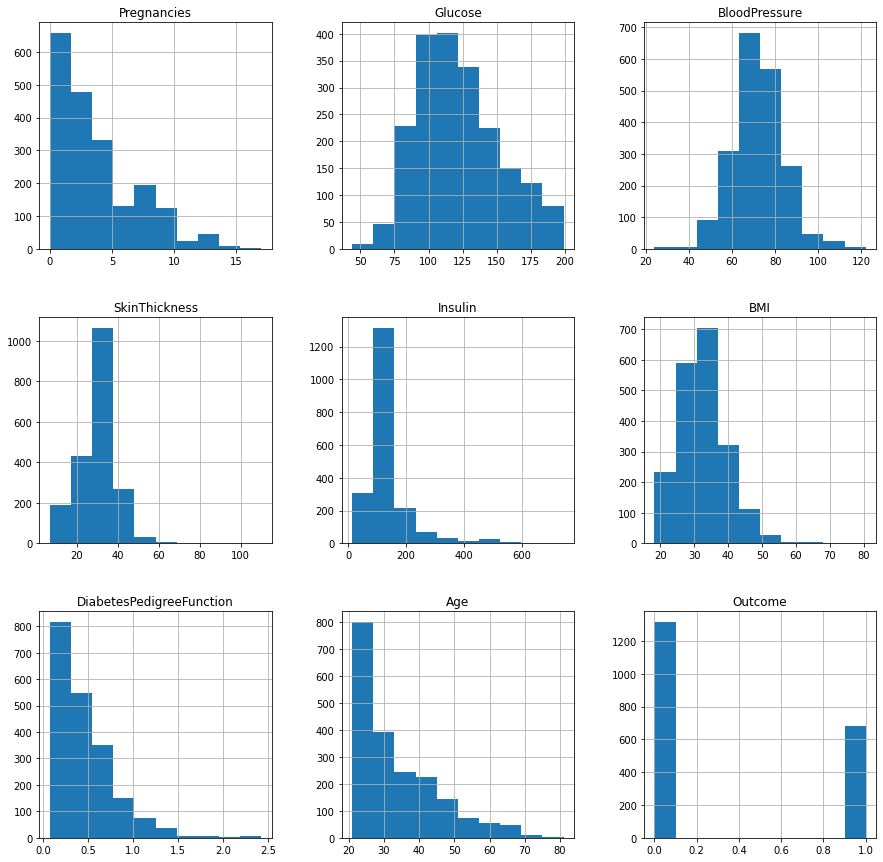

In [19]:
data_.hist(figsize=(15,15))
plt.show()

In [20]:
data_.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Model Building

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

In [22]:
X = data.drop(columns='Outcome')
y = data['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((1600, 8), (400, 8), (1600,), (400,))

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Hyperparameter Tuning 

In [25]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ShuffleSplit

In [26]:
def best_model(X,y):
    models = {
        'Logistic_Regression' : {
            'model' : LogisticRegression(solver='lbfgs' ,multi_class='auto'),
            'parameters': {
                'C':[1,5,10]
            }
        },

        'Decision_Tree':{
            'model' : DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion':['gini' ,'entropy'],
                'max_depth':[5,10]
            }
        },

        'Random_Forest':{
            'model' : RandomForestClassifier(criterion='gini'),
            'parameters':{
                'n_estimators':[10,15,20,50,100,200]
            }
        },

        'Support_Vector_Machine':{
            'model': SVC(gamma='auto'),
            'parameters':{
                'C':[1,10,20],
                'kernel':['rbf' ,'linear']
            }
        }
    }


    scores =[]
    cv_shuffle = ShuffleSplit(n_splits=5 ,test_size=0.20 ,random_state=42)

    for model_name ,model_params in models.items():
        tuning = GridSearchCV(model_params['model'] ,model_params['parameters'] ,cv = cv_shuffle ,return_train_score=False)

        tuning.fit(X,y)
        scores.append(
            {
                'model': model_name ,
                'best_parameters':tuning.best_params_,
                'score':tuning.best_score_
            }
        )

    return pd.DataFrame(scores ,columns=['Model' ,'Best Parameters' ,'Score']).sort_values(by='Score' ,ascending=False)


In [27]:
best_model(X_train ,y_train)


,Model,Best Parameters,Score
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


## Cross Val Score

In [28]:
from sklearn.model_selection import cross_val_score 
score = cross_val_score(RandomForestClassifier(n_estimators=20 ,random_state=0),X_train ,y_train , cv=10)

In [29]:
print('Average Accuracy : {}'.format(round(sum(score)*100 / len(score)),3))

Average Accuracy : 96


## Random-Forest Model

In [30]:
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [31]:
y_predict = model.predict(X_test)

# Model Evaluation

In [32]:
from sklearn.metrics import confusion_matrix ,accuracy_score ,classification_report

## Test Set

In [33]:
print('Accuracy of Test Set : {}'.format(round(accuracy_score(y_test ,y_predict),3)*100))

Accuracy of Test Set : 98.5


In [34]:
print('Classification Report for Test Set:\n\n ',classification_report(y_test, y_predict))


Classification Report for Test Set:

                precision    recall  f1-score   support

           0       0.98      0.99      0.99       253
           1       0.99      0.97      0.98       147

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



## Train Set

In [35]:
y_train_predict = model.predict(X_train)

In [36]:
print('Accuracy of Train Set : {}'.format(
    round(accuracy_score(y_train, y_train_predict), 3)*100))


Accuracy of Train Set : 100.0


In [37]:
print('Classification Report for Train Set:\n\n ',
      classification_report(y_train, y_train_predict))


Classification Report for Train Set:

                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00       537

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



## Confusion Matrix

In [38]:
cf_matrix = confusion_matrix(y_test ,y_predict)

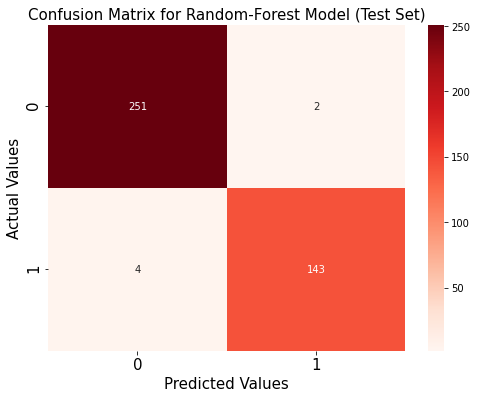

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix ,annot=True ,cmap='Reds',fmt='.3g')
plt.title('Confusion Matrix for Random-Forest Model (Test Set)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Predicted Values' ,fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.show()


In [40]:
cf_train_matrix = confusion_matrix(y_train, y_train_predict)

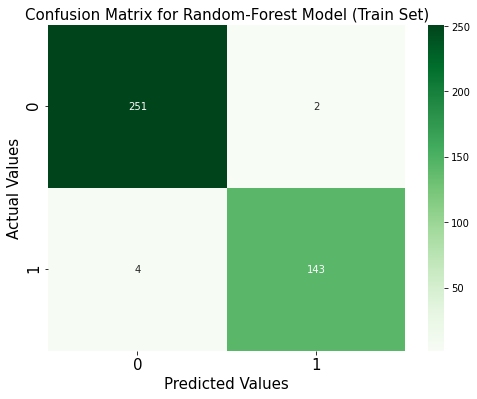

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot=True, cmap='Greens',fmt='.4g')
plt.title('Confusion Matrix for Random-Forest Model (Train Set)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Actual Values', fontsize=15)
plt.show()
